## Data Ingestion Pipeline
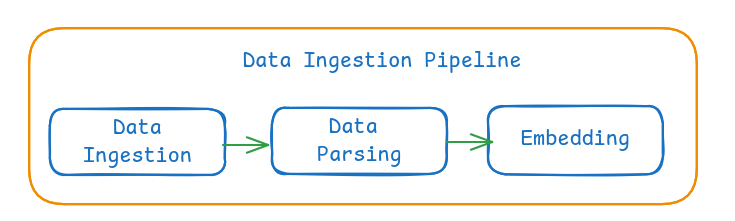


In pipeline we have first step is  Data Ingestion. In this we can have any type of files format like
- HTML File
- PDF FIle
- DB File
- Excel File etc

In data Ingestion our Main strategy is that
- proces to read these files formats
- perform data parsing using Document loader in langchain
- doing Chunking strategy
- convert into a document Structure
- Embedding


In [1]:
# Requirement
!pip install langchain langchain-core langchain-community pypdf pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 494.4 kB/s  0:00:53m0:00:0100:02


#### Langchain Document Struture :
Before Data Ingestion let learn this topic because after all the chunking is done then the final output will be in Document Data Structure
#### what is Document datastructure:
It is kind of Datastructure which save the data in some format where we have two important things
- page_content(str)
- meta_data(dic)

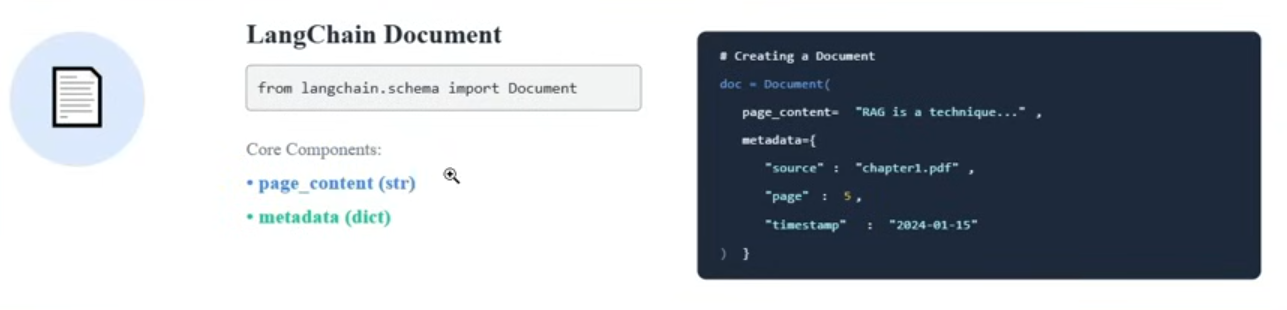

In [ ]:
# document Structure
import os
from langchain_core.documents import Document

In [3]:
# let understnad the docuemtn structure
doc = Document(
    page_content="This is the main rext content I am using to create the RAG",
    metadata = {
        "source" :" example.txt",
        "pages":1,
        "author ":"Talha",
        "date_created":"2025-10-06"
    }
)
doc

Document(metadata={'source': ' example.txt', 'pages': 1, 'authour ': 'Talha', 'date_created': '2025-10-06'}, page_content='this is the main rext content i am using to create the RAG')

## Data Ingestion
- Read the pdf file and txt file  in Langchain



### work with .txt file

In [5]:
# create the txt_file
import os
save_dir = './data/text_files'
os.makedirs(save_dir, exist_ok=True)
print('Directory created →', save_dir)

Directory created → ./data/text_files


In [6]:
sample_texts={
    "./data/text_files/rag_history_part1.txt":"""History of Retrieval-Augmented Generation (RAG) - FoundationsThe concept of RAG is a culmination of decades of
    research in two distinct fields: Information Retrieval (IR) and Natural Language Generation (NLG).Early Foundations (1950s-1990s):-
    Information Retrieval: Researchers like Hans Peter Luhn and Gerald Salton laid the groundwork with systems like vector space models and TF-IDF to retrieve relevant documents.
    - Natural Language Generation: Early efforts in machine translation and grammar-based text generation began, followed by statistical language models like n-grams (1980s-1990s) in the NLG space.
    Initially, IR and NLG largely operated as separate disciplines. The history of question-answering systems, dating back to the 1960s with programs like SHRDLU and Baseball,
    also laid a conceptual foundation for combining retrieval and response.""",

    "./data/text_files/rag_history_part2.txt": """History of Retrieval-Augmented Generation (RAG) - Modern EraEarly Integration and Neural Networks (2000s-2010s):- Question-Answering Systems:
    Projects like IBM Watson's DeepQA (2007–2011) marked a shift by using retrieval to gather information and statistical models to generate answers, though in a pipeline fashion.
    - Neural Networks: The development of Transformers and dense retrieval techniques (like embeddings-based search) in the 2010s accelerated the integration,
    showing the potential for hybrid architectures.The Emergence of RAG:The formalization of Retrieval-Augmented Generation as a distinct paradigm came with
     the landmark paper "Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks" by **Patrick Lewis and colleagues in 2020** (from Facebook AI Research, UCL, and NYU).
     This paper proposed a unified framework where an external retriever fetches relevant documents, and a generative model (like T5) conditioned on this retrieved knowledge produces a response.
     This directly addressed LLM challenges such as hallucinations and outdated knowledge without needing a full model retraining."""
}

# from google.colab import files
# uploaded = files.upload()
# for name in uploaded:
#   with open(os.path.join(save_dir, name), "wb") as f:
#     f.write(uploaded[name])

for filepath ,content in sample_texts.items():

  with open(filepath,"w",encoding = "utf-8")as f:
    f.write(content)

In [7]:
# read this text or txt file using Text Loader inside the Langchian
from langchain_community.document_loaders import TextLoader
# TextLoader("path with file name" , "encoding ")
loader = TextLoader("data/text_files/rag_history_part1.txt",encoding="utf-8")
loader

In [8]:
document = loader.load()
print(document)

[Document(metadata={'source': 'data/text_files/rag_history_part1.txt'}, page_content='History of Retrieval-Augmented Generation (RAG) - FoundationsThe concept of RAG is a culmination of decades of\n    research in two distinct fields: Information Retrieval (IR) and Natural Language Generation (NLG).Early Foundations (1950s-1990s):-\n    Information Retrieval: Researchers like Hans Peter Luhn and Gerald Salton laid the groundwork with systems like vector space models and TF-IDF to retrieve relevant documents.\n    - Natural Language Generation: Early efforts in machine translation and grammar-based text generation began, followed by statistical language models like n-grams (1980s-1990s) in the NLG space.\n    Initially, IR and NLG largely operated as separate disciplines. The history of question-answering systems, dating back to the 1960s with programs like SHRDLU and Baseball,\n    also laid a conceptual foundation for combining retrieval and response.')]


In [9]:
# let read all data in the folder which is Directry loader
from langchain_community.document_loaders import DirectoryLoader
Dir_loader = DirectoryLoader(
    save_dir,
    glob = "**/*.txt", # pattern to match files
    loader_cls=TextLoader,
    loader_kwargs={"autodetect_encoding": True},
    show_progress=True
)


In [10]:
Dir = Dir_loader.load()
Dir

100%|██████████| 2/2 [00:00<00:00, 2085.16it/s]


[Document(metadata={'source': 'data/text_files/rag_history_part1.txt'}, page_content='History of Retrieval-Augmented Generation (RAG) - FoundationsThe concept of RAG is a culmination of decades of\n    research in two distinct fields: Information Retrieval (IR) and Natural Language Generation (NLG).Early Foundations (1950s-1990s):-\n    Information Retrieval: Researchers like Hans Peter Luhn and Gerald Salton laid the groundwork with systems like vector space models and TF-IDF to retrieve relevant documents.\n    - Natural Language Generation: Early efforts in machine translation and grammar-based text generation began, followed by statistical language models like n-grams (1980s-1990s) in the NLG space.\n    Initially, IR and NLG largely operated as separate disciplines. The history of question-answering systems, dating back to the 1960s with programs like SHRDLU and Baseball,\n    also laid a conceptual foundation for combining retrieval and response.'),
 Document(metadata={'source': 

### Work with pdf file

In [12]:
from langchain_community.document_loaders import PyPDFLoader, PyMuPDFLoader
PDF_DIR = "./content/pdfs"
os.makedirs(PDF_DIR, exist_ok=True)
uploaded = files.upload()
for name in uploaded:
  with open(os.path.join(PDF_DIR, name), "wb") as f:
    f.write(uploaded[name])
print("Uploaded:", os.listdir(PDF_DIR))

NameError: name 'files' is not defined

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
Dir_loader = DirectoryLoader(
    PDF_DIR,
    glob = "**/*.pdf", # pattern to match files
    loader_cls=PyMuPDFLoader,
    show_progress=True
)
pdf_document =  Dir_loader.load()
pdf_document

In [ ]:
type(pdf_document[0])

In [ ]:
# as we know the how things done in langchain lets make the function that read all the pdf files form directry with proper document structuring instead
# same things go to different files formats like .txt ,.csv.pdf etc
from pathlib import Path
def process_all_pdfs(pdf_directory):
    all_document = []
    pdf_dir = Path(pdf_directory)
    pdf_files = list(pdf_dir.glob("**/*.pdf"))
    print(f"found {len(pdf_files)}")
    for pdf_file in pdf_files:
        print(f"\nprocessing: {pdf_file.name}")
        try:
            loader = PyPDFLoader(str(pdf_file))   # <-- fix: pass full path, not .name
            document = loader.load()
            for doc in document:
                doc.metadata["source_file"] = pdf_file.name
                doc.metadata["file_type"] = "pdf"
            all_document.extend(document)
            print(f"loaded {len(document)} pages")
        except Exception as e:
            print(f"Error:{e}")
    print(f"\ntotal documents loaded:{len(all_document)}")
    return all_document

all_pdf_documents = process_all_pdfs("./pdfs")


In [ ]:
all_pdf_documents = process_all_pdfs("./pdfs")

In [ ]:
all_pdf_documents

## Document Chunking


In [ ]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
# as we have all our documents so we will do text spliting get into chunks and for this we used resursivechracter splitter
def split_documents(documents,chunks_size=1000,chunk_overlap =200):
  text_splitter = RecursiveCharacterTextSplitter(
      chunk_size= chunks_size,
      chunk_overlap = chunk_overlap,
      length_function = len,
      separators =["\n\n","\n"," ",""]
      )
  split_docs = text_splitter.split_documents(documents)
  print(f"split{len(documents)} documents into {len(split_docs)} chunks")
  if split_docs:
    print(f"Content:{split_docs[0].page_content[:400]}...")
    print(f"Metadata:{split_docs[0].metadata}")
  return split_docs


In [ ]:
chunks = split_documents(all_pdf_documents)
chunks

## Embedding Using opensource model from Hugging Face
. converting the Chunks into Vectors


In [ ]:
# library we used for embedding is sentence transformers and for vector store we can used faiss or chromadb
!pip install  sentence-transformers faiss-cpu chromadb

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings
import uuid
from typing import List,Dict,Any,Tuple


In [ ]:
class EmbeddingManager:
  "it handle the document  embedding genratiion using SentenceTransformers"
  def __init__(self,model_name:str ="sentence-transformers/all-MiniLM-L6-v2"):
    """initizlize the embedding manager
    Args:
    model_name: Hugging face model name for sentence  embedddings
    """
    self.model_name = model_name
    self.model = None
    self._load_model()

  def _load_model(self):
    "load the SentenceTrasformer model"
    try:
      self.model= SentenceTransformer(self.model_name)
      print(f"model loaded sucessfully.Embedding  dimention:{self.model.get_sentence_embedding_dimension()}")
    except Exception as e:
      print(f"Error loading model {self.model_name}:{e}")
      raise

  def generate_embedding(self,texts:List[str])-> np.array:
    """Generate the  embedding for a list of text
    Args:
    texts: list of text strings to embed
    Return:
    numpy array of embeddings with shape (len(texts),embedding_dim)
    """
    if not self.model:
      raise ValueError("MODEL not loaded")
    embeddings = self.model.encode(texts,show_progress_bar= True)
    print(f"embeddings with shape :{embeddings.shape}")
    return embeddings


In [ ]:
# initilizing the Embedding Manager constructor
embedding_manager =  EmbeddingManager()
embedding_manager

##  Retrival Pipeline

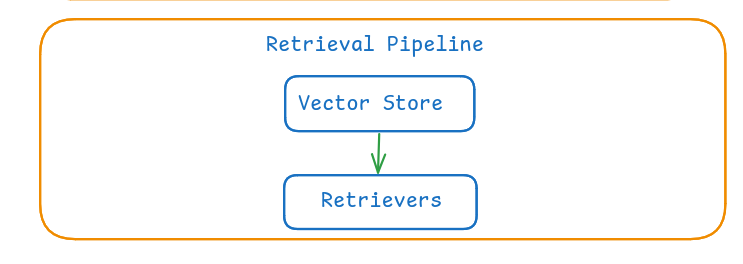

### VectorStore Db

In [ ]:
class VectorStore:
  "managing the document in chroma db vector store"
  def __init__(self,collection_name:str = "pdf_documents",persist_directory :str="./data/vector_store"):
    """
    initilizing the vector store
    Args:
    collection_name :Nmae of the Chromadb collection
    persist_directory: Directory to persis the vector store
    """
    self.collection_name = collection_name
    self.persist_directory = persist_directory
    self.client = None
    self.collection = None
    self._initialize_store()


  def _initialize_store(self):
    """initialize the choromadb client and collection"""
    try:
      # create the directory
      os.makedirs(self.persist_directory,exist_ok=True)
      self.client = chromadb.PersistentClient(path = self.persist_directory)
      #create the collection
      self.collection = self.client.get_or_create_collection(
          name = self.collection_name,
          metadata = {"decsription":"PDF document embeddingsfor Rag"}
      )
      print(f"Vector store initilized.Collections:{self.collection_name}")
    except Exception as e:
      print("error in initializing the vector store {e}")
      raise

  def add_documents(self,document:List[Any],embeddings:np.ndarray):
    """
    Add documents and their  embedding to the vector store
    Args:
    documents: list of langchain documents
    embeddings : corresponding embedding for  documents

    """
    if len(document) != len(embeddings):
      raise ValueError("number of documents that must match number of embedding")


    # prepare data for chromadb
    ids = []
    metadatas = []
    documents_text = []
    embeddings_list = []
      # creating tuples with embeddings and zip it
    for i ,(doc,embedding) in enumerate(zip(document,embeddings)):
      # generate the id for specific record
      doc_id = f"doc{uuid.uuid4().hex[:8]}_{i}"
      ids.append(doc_id)

      # prepare the metadata
      metadata = dict(doc.metadata)
      metadata["doc_index"] = i
      metadata["content_length"] = len(doc.page_content)
      metadatas.append(metadata)

      # document content
      documents_text.append(doc.page_content)

      #embeddings
      # FIX: Call the tolist() method
      embeddings_list.append(embedding.tolist())
    # add to collection
    try:
      self.collection.add(
          ids = ids,
          embeddings=embeddings_list,
          metadatas=metadatas,
          documents=documents_text
      )
      print(f"Sucessfully added {len(document)} documents to vector store")
      print(f"document in collection:{self.collection.count()}")
    except Exception as e:
      print(f"error adding documents to vector store :{e}")

In [ ]:
vectorstore =  VectorStore()
vectorstore

In [ ]:
# add number of recird we call add_documents
# chunks

In [ ]:
# extract all the text from that chunks and generate the embedding
# convert a the text too embeddings
text = [doc.page_content for doc in chunks]
# pass this to embedding manager to Generate the embeddings

embedding = embedding_manager.generate_embedding(text)

# store in the vector database
vectorstore.add_documents(chunks,embedding)



### Rag Retrival Pipeline
- when user do query we have to take the query
- convert it into embedding
- hit the vector store in the form of Retriver
- then get the context

In [ ]:
# retriever is build on vector store(it is simple iterface base on what ever querry we get the retriver is give you the response back)
class Ragretriever:
  """
  Handle Query-based retrival from vector store)
  """
  def __init__(self,vector_store:VectorStore ,embedding_manager:EmbeddingManager):
    self.vector_store= vector_store
    self.embedding_manager=embedding_manager

  def retrieve(self, query: str, top_k: int = 5, score_threshold: float = 0.0) -> List[Dict[str, Any]]:
    """
    Retrieve relevant documents for a query.

    Args:
        query: The search query.
        top_k: Number of top results to return.
        score_threshold: Minimum similarity score threshold.

    Returns:
        List of dictionaries containing retrieved documents and metadata.
    """
    print(f"Retrieving documents for query: '{query}'")
    print(f"Top k: {top_k}, Score threshold: {score_threshold}")
    # Generate query embedding  of query
    query_embedding = self.embedding_manager.generate_embedding([query])[0]

    # Search in vector store
    # hit the vectore db that we initizlize
    try:
        results = self.vector_store.collection.query(
            query_embeddings=[query_embedding.tolist()],
            n_results=top_k
        )

        # Process results
        retrieved_docs = []

        if results['documents'] and results['documents'][0]:
            documents = results['documents'][0]
            metadatas = results['metadatas'][0]
            distances = results['distances'][0]
            ids = results['ids'][0]
            for i, (doc_id, document, metadata, distance) in enumerate(zip(ids, documents, metadatas, distances)):
              # Convert distance to similarity score (ChromaDB uses cosine distance)
              similarity_score = 1 - distance if distance <= 1 else 0.0

              if similarity_score >= score_threshold:
                  retrieved_docs.append({
                      'id': doc_id,
                      'content': document,
                      'metadata': metadata,
                      'similarity_score': similarity_score,
                       'distance': distance,
                        'rank': i + 1
                    })
            if retrieved_docs:
                print(f"Retrieved {len(retrieved_docs)} documents (after filtering)")
            else:
                print("No documents found")

            return retrieved_docs

    except Exception as e:
        print(f"Error during retrieval: {e}")
        return []

In [ ]:
rag_retriever = Ragretriever(vectorstore,embedding_manager)


In [ ]:
rag_retriever

In [ ]:
rag_retriever.retrieve("histroy of rag")

## Augmentation layer + Generation
- send to retrival docuement(context) + prompt instruction to LLM Then send to user

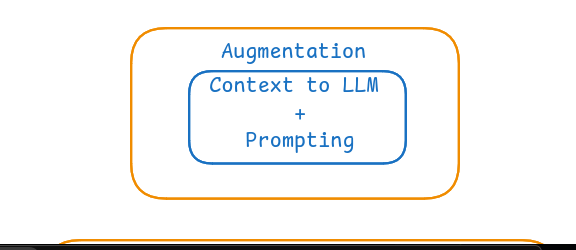

In [ ]:
!pip install langchain_groq

In [ ]:
Groq_API_KEY = "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"

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=Groq_API_KEY,model="gemma2-9b-it",temperature=0.1,max_tokens=1024)
llm

In [ ]:
# simple rag function : to retrieve context +generate response
def rag_simple(query,retriever,llm,top_k=3):
  # retrieve the context
  results = retriever.retrieve(query,top_k=top_k)
  context = "\n\n".join([doc['content'] for doc in results]) if results else ""
  if not context:
    return "NO relevent context found to answer teh question"

  ## generate the answer using GROQ LLM
  prompt=f"""Use the following context to answer the question concisely.

    Context:
    {context}

    Question: {query}

    Answer:"""

  response = llm.invoke(prompt.format(context=context, query=query))
  return response.content



In [ ]:
query = "what is attention in transformers"
results = rag_retriever.retrieve(query, top_k=3, score_threshold=-1.0)
print(results)

#